In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import data_load
import train_util
import train_tl
from importlib import reload

import tensorflow.keras as keras
from tensorflow.keras import applications
from tensorflow.keras.layers import Flatten, LeakyReLU, Dense
from tensorflow.keras.models import *
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import datetime


# training data
image_size = 224
#labels = pd.read_csv("data/fgvc7/train.csv")
image_dir = "data/unlabeled"


tf.random.set_seed(1234)
np.random.seed(seed=1234)

In [36]:
from tensorflow.keras import applications
base_model = applications.EfficientNetB0(weights='imagenet', input_shape=(image_size, image_size, 3),  include_top=False)

# Create new model on top.
inputs = keras.Input(shape=(image_size, image_size, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
outputs = keras.layers.Dense(128)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
Total params: 4,771,107
Trainable params: 4,729,084
Non-trainable params: 42,023
_______________________________________

In [4]:
# import training data and combine labels
data = data_load.load_unlabeled_data(image_size, image_dir) 
print(len(data))

11576


In [ ]:
warmup_epoch = 5
total_epoch = 50
lr = 0.001
temperature = 0.1

model = train_util.train(model = model, data = data, batch_size = 32, warmup_epoch = warmup_epoch, total_epoch = total_epoch, lr = lr,  temperature=temperature)

********************************************************************
**                        Warmup Epoch: 0                         **
********************************************************************
Iter: 10 Step: 10 Loss: 1.54701 LR:  0.000998
Iter: 20 Step: 20 Loss: 0.99941 LR:  0.000993
Iter: 30 Step: 30 Loss: 0.93198 LR:  0.000984
Iter: 40 Step: 40 Loss: 0.80998 LR:  0.000972
Iter: 50 Step: 50 Loss: 0.71980 LR:  0.000955
Iter: 60 Step: 60 Loss: 0.74009 LR:  0.000936
Iter: 70 Step: 70 Loss: 0.80599 LR:  0.000913
Iter: 80 Step: 80 Loss: 0.61091 LR:  0.000887
Iter: 90 Step: 90 Loss: 0.62830 LR:  0.000858
Iter: 100 Step: 100 Loss: 0.46972 LR:  0.000827
Iter: 110 Step: 110 Loss: 0.56614 LR:  0.000792
Iter: 120 Step: 120 Loss: 0.45860 LR:  0.000756
Iter: 130 Step: 130 Loss: 0.51159 LR:  0.000718
Iter: 140 Step: 140 Loss: 0.46336 LR:  0.000678
Iter: 150 Step: 150 Loss: 0.62194 LR:  0.000637
Iter: 160 Step: 160 Loss: 0.50957 LR:  0.000595
Iter: 170 Step: 170 Loss: 0.68551 LR:  0.00

In [ ]:
x2 = keras.layers.GlobalAveragePooling2D()(model.layers[1].output)
outputs2 = keras.layers.Dense(4)(x2)

model2 = keras.Model(model.layers[1].input, outputs2)

In [ ]:
reload(train_tl)

model_name = f'CL_{model.layers[1].name}_{datetime.datetime.now().strftime("%m%d_%H%M")}'
submission_file = f"submissions/{model_name}.csv"
model2, history = train_tl.train_tl(model2, submission_filename = submission_file)

In [ ]:
#comments = f'"CL_{model.layers[1].name}_{date.today()}"'
file = f'"{submission_file}"'

layers = [l.weights[0].shape[1] for l in model.layers[3-len(model.layers):] if type(l).__name__ == 'Dense']
comment = f'"{warmup_epoch},{total_epoch},{lr},{temperature},{layers},{len(data)}"'
!kaggle competitions submit -f $file  -m $comment plant-pathology-2020-fgvc7


In [ ]:
!kaggle competitions submissions plant-pathology-2020-fgvc7    
model2.save(f'models/{model_name}.pb')

## Grad-Cam test

Predicted: scab


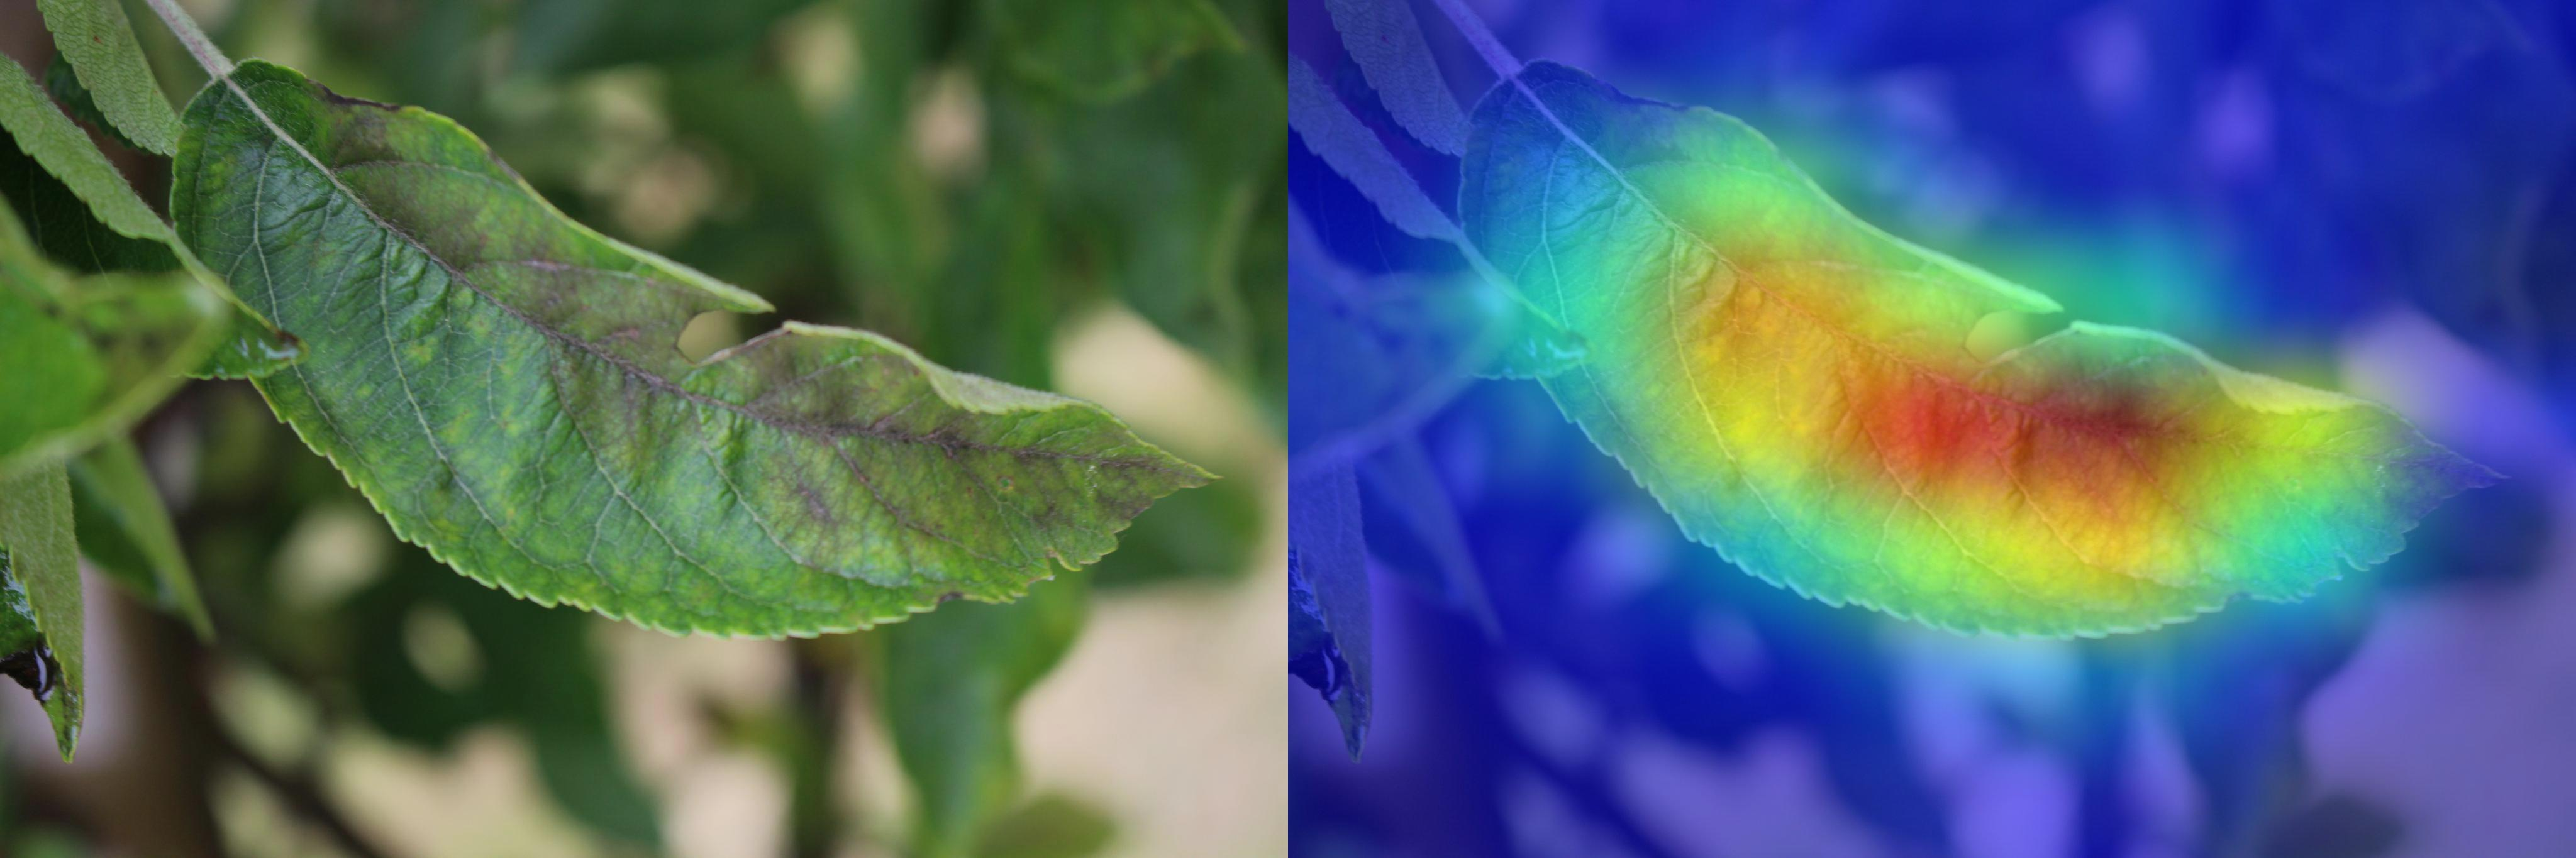

In [101]:
import grad_cam
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_2.jpg")

Predicted: healthy


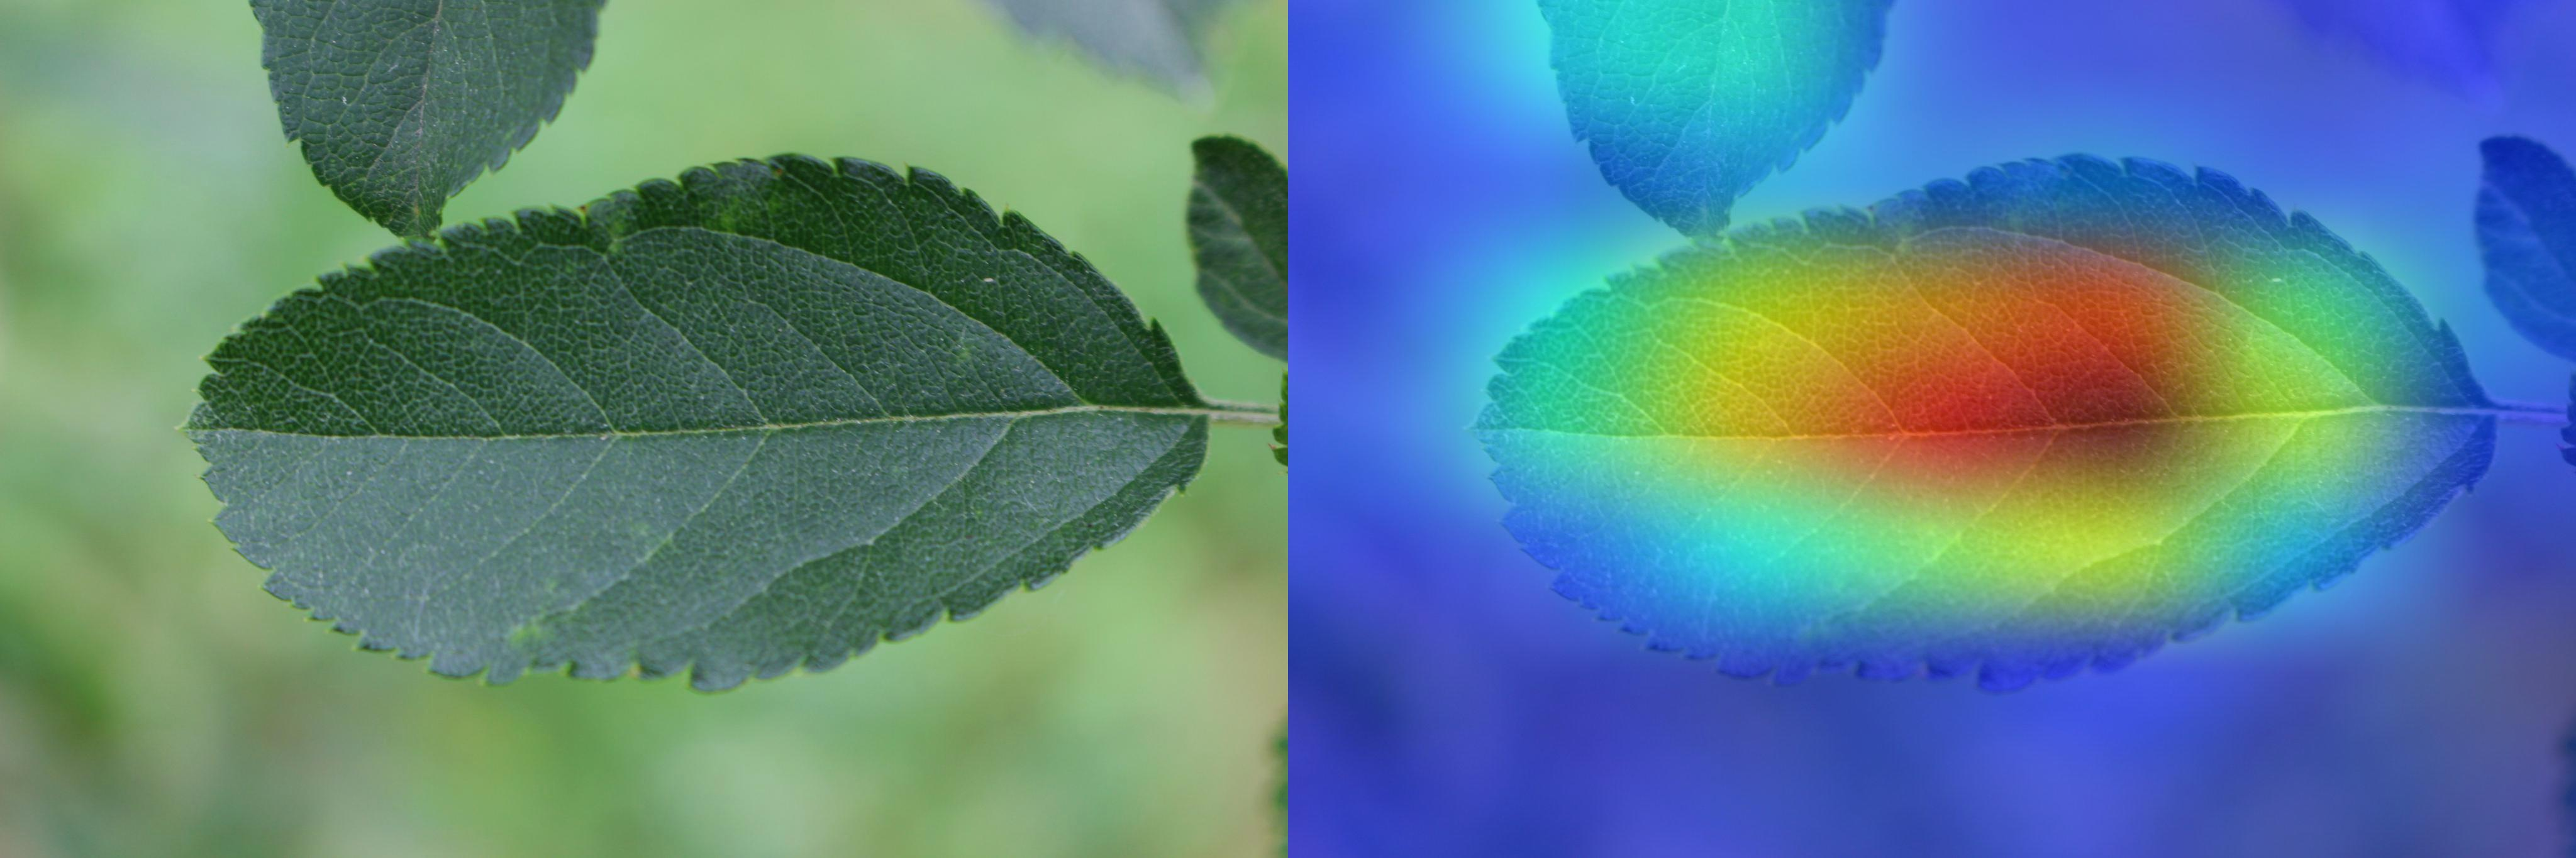

In [102]:
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_3.jpg")

Predicted: rust


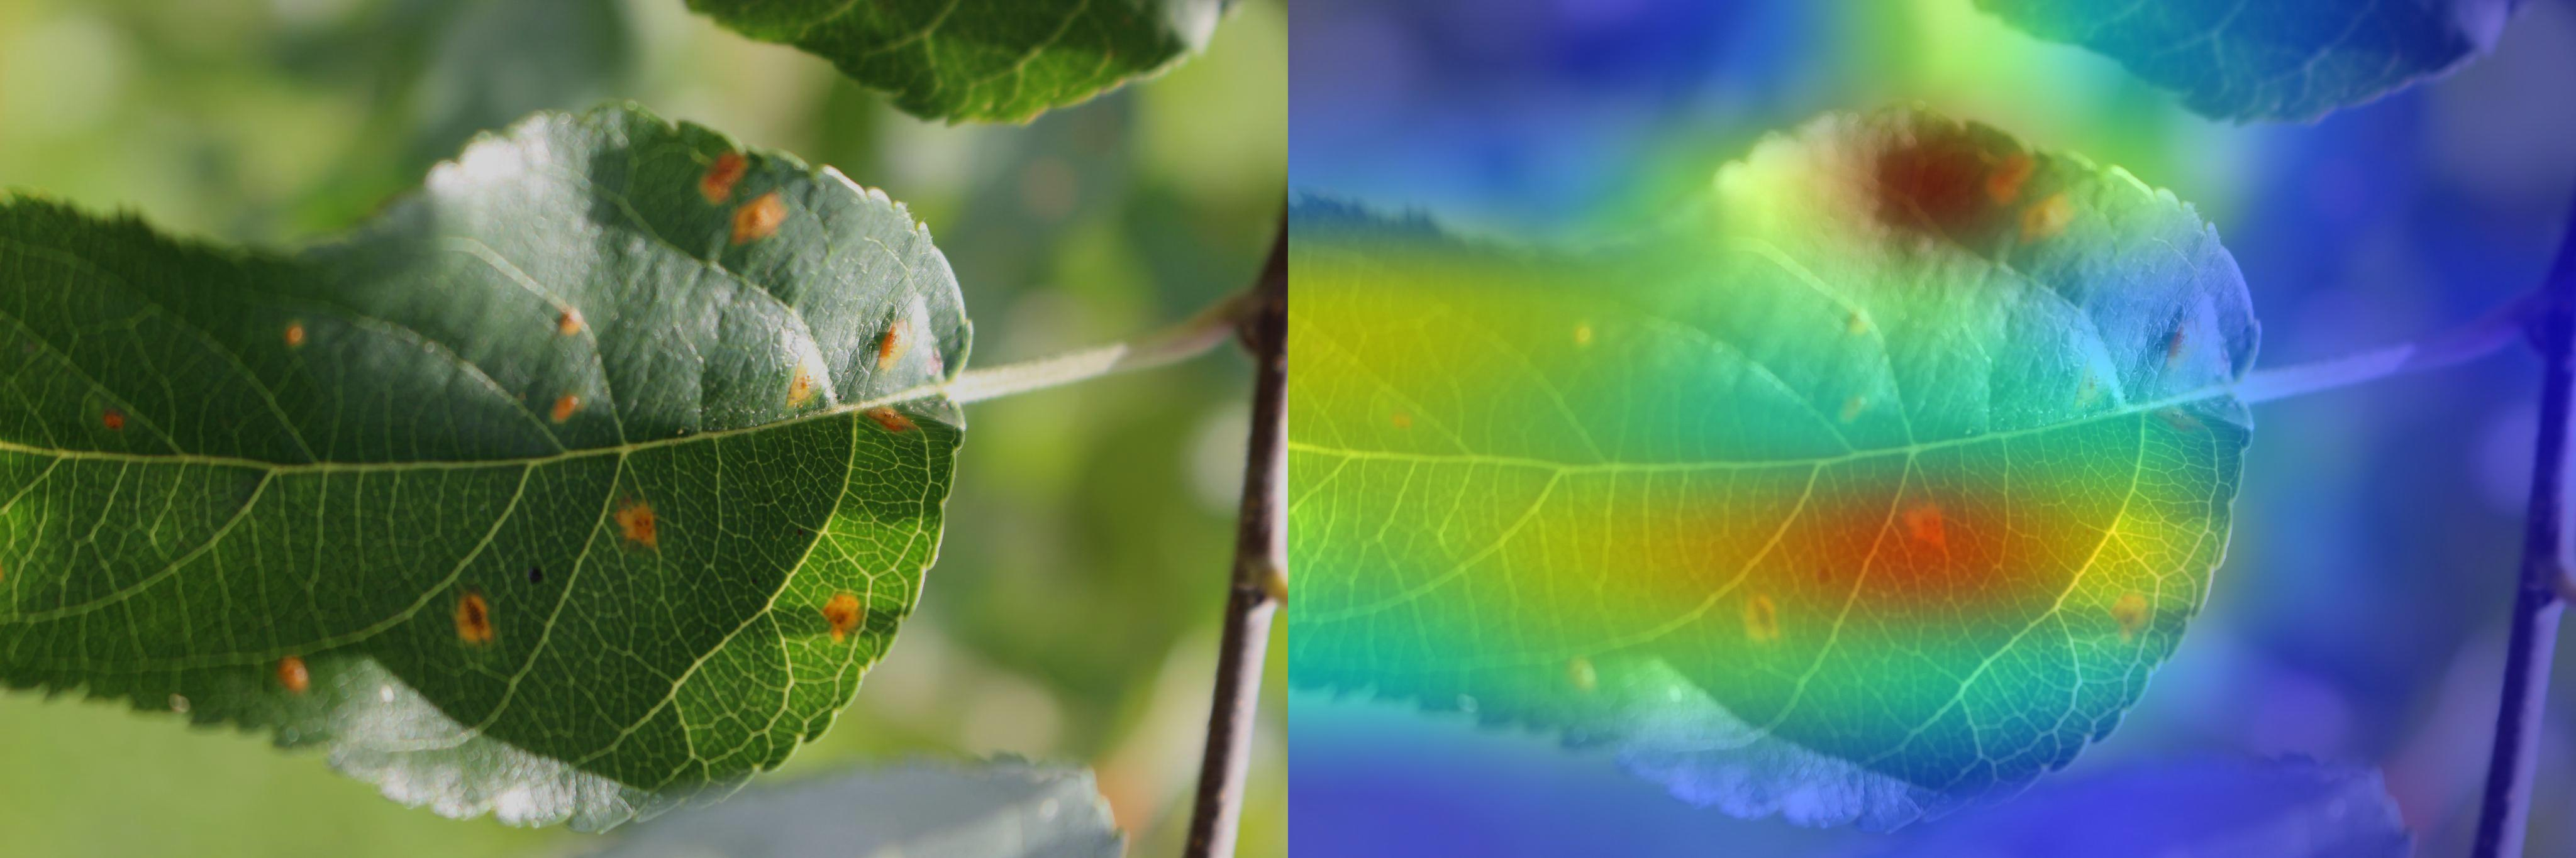

In [103]:
grad_cam.showGradCam(model2, img_path = r"F:\notebooks\capstone\data\fgvc7\images\Test_4.jpg")